In [ ]:
from scipy.stats import norm, expon, skew, kurtosis, iqr, describe
import seaborn as sns

# Ejercicio 1

La desviacion que hay en la muestra obtenida es -0.869747321129399
La oblicuidad que hay en la muestra obtenida es 0.853056098324553
El IQR que observado en la muestra obtenida es de 1.4146366867086035


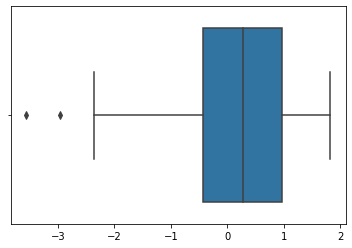

In [ ]:
# Defino la cantidad de tiradas
N = 100
# Defino la normal y realizo las simulaciones
normal_vals = norm(loc=0, scale=1).rvs(N)

# Calculo las mediciones que pide el ejercicio
ej1_normal_skew = skew(normal_vals)
ej1_normal_kurt = kurtosis(normal_vals)
ej1_normal_iqr = iqr(normal_vals)

# Outputs
print(f'La desviacion que hay en la muestra obtenida es {ej1_normal_skew}')
print(f'La oblicuidad que hay en la muestra obtenida es {ej1_normal_kurt}')
print(f'El IQR que observado en la muestra obtenida es de {ej1_normal_iqr}')


#Grafico
sns.boxplot(x=normal_vals)



# Ejercicio 2

La desviacion que hay en la muestra obtenida es 1.4296441014622263
La oblicuidad que hay en la muestra obtenida es 1.6612455850912795
El IQR que observado en la muestra obtenida es de 1.0012546218929026
El desvio estandar de la muestra obtenida es de 0.9355020544859348
La estimacion del desvio estandar en la muestra obtenida es de 5.006038718566259


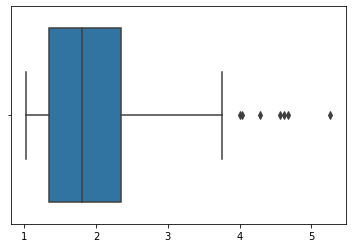

In [ ]:
# Defino la cantidad de tiradas
N = 100
# Defino la expon y realizo las simulaciones
expon_vals = expon(1).rvs(N)

# Calculo las mediciones que pide el ejercicio
ej2_expon_skew = skew(expon_vals)
ej2_expon_kurt = kurtosis(expon_vals)
ej2_expon_iqr = iqr(expon_vals)
ej2_expon_describe = describe(expon_vals)

# Outputs
print(f'La desviacion que hay en la muestra obtenida es {ej2_expon_skew}')
print(f'La oblicuidad que hay en la muestra obtenida es {ej2_expon_kurt}')
print(f'El IQR que observado en la muestra obtenida es de {ej2_expon_iqr}')
print(f'El desvio estandar de la muestra obtenida es de {(ej2_expon_describe.variance)**(1/2)}')
print(f'La estimacion del desvio estandar en la muestra obtenida es de {(max(expon_vals)-min(expon_vals)/4)}')


#Grafico
sns.boxplot(x=expon_vals)

# Ejercicio 3

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import t

import math 
import pandas as pd

In [ ]:
amazon = yf.download('AMZN', start="2021-01-01", end="2021-05-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
#Ordeno los elementos
amazon_close_sorted = sorted(amazon['Close'])

# Saco el 2.5% de cada lado para recortar los outliers
umb_recorte = math.floor(len(amazon_close_sorted)*0.025)

amazon_recortado = amazon_close_sorted[0+umb_recorte: -umb_recorte]

amazon_close_recor = amazon['Close'].loc[(amazon_recortado[0] < amazon['Close']) & (amazon['Close'] < amazon_recortado[-1])]

# Calculo el Rango y estimo la desviacion Standard
rango = amazon_recortado[-1] - amazon_recortado[0]

s = rango/4


# Calculo la media recortada
mean_amazon_recor = amazon_close_recor.mean()


print(f'El n muestral recortado quedo de: {len(amazon_recortado)}')
print(f'El rango muestral es: {rango}')
print(f'La media recortada quedo de: {mean_amazon_recor}')



El n muestral recortado quedo de: 78
El rango muestral es: 458.0400390625
La media recortada quedo de: 3216.4886667351975


In [ ]:
# Calculo los Quartiles y el IQR
Q1 = amazon_recortado[math.floor(len(amazon_close_sorted)*0.25)]
Q2 = amazon_recortado[math.floor(len(amazon_close_sorted)*0.5)]
Q3 = amazon_recortado[math.floor(len(amazon_close_sorted)*0.75)]

IQR = Q3 - Q1

print(f'1º Quartil: {Q1}')
print(f'2º Quartil: {Q2}')
print(f'3º Quartil: {Q3}')
print(f'IQR: {IQR}')


1º Quartil: 3113.590087890625
2º Quartil: 3232.580078125
3º Quartil: 3331.0
IQR: 217.409912109375


In [ ]:
#Defino el valor de compra [Precio promedio actual de los de los ultimos 30 dias]
media_de_compra = amazon['Close'].rolling(30).mean()[-1]

#Defino el valor de venta minimo [Precio promedio actual de los de los ultimos 30 dias]
media_de_venta_2porciento = amazon['Close'].rolling(30).mean()[-1] * 1.02

#Calculo estadistico t para el alfa=0.05 y los grados de libertad
t_0 = t.ppf(0.95, len(amazon_recortado)-1)

# Calculo el valor minimo para aceptar la hipotesis nula [Despeje de la funcion de t]
valor_minimo_h0 = media_de_venta_2porciento - t_0*s/(len(amazon_recortado))**0.5


print(f'La media recortada quedo de: {mean_amazon_recor}')
print(f'La media minima que validaria la hipotesis nula es de: {valor_minimo_h0}')
print('\n')
print('Por lo tanto no conviene comprar ya que no hay evidencia para asegurar con un 95% de confianza que se va a ganar un 2%')


La media recortada quedo de: 3216.4886667351975
La media minima que validaria la hipotesis nula es de: 3314.8148958661745


Por lo tanto no conviene comprar ya que no hay evidencia para asegurar con un 95% de confianza que se va a ganar un 2%


In [ ]:
mean_amazon_recor > valor_minimo_h0

False

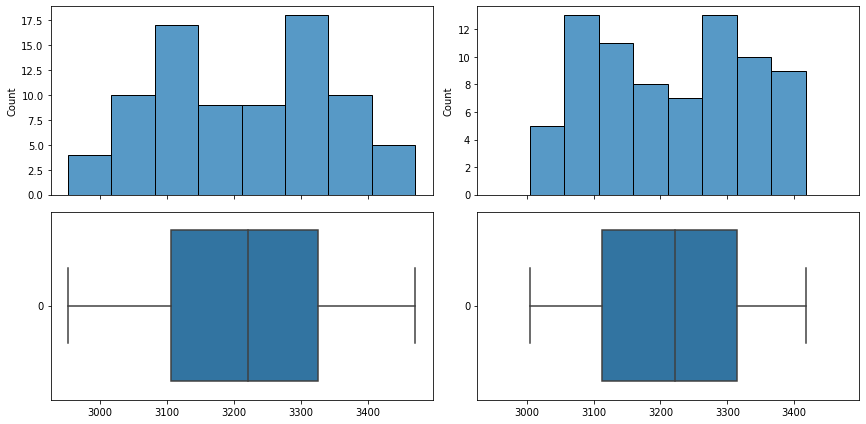

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(12,6), sharex=True)
sns.histplot(data=amazon['Close'], ax=ax[0,0])
sns.boxplot(data=amazon['Close'], orient='h', ax=ax[1,0])

sns.histplot(data=amazon_close_recor, ax=ax[0,1])
sns.boxplot(data=amazon_close_recor, orient='h', ax=ax[1,1])

plt.tight_layout()

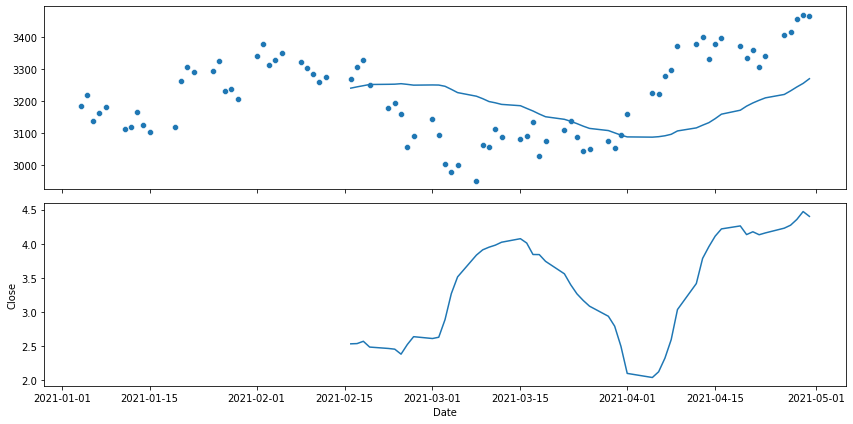

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(12,6), sharex=True)
sns.scatterplot(x=amazon['Close'].index, y=amazon['Close'].values, ax=ax[0])
sns.lineplot(x=amazon['Close'].index, y=amazon['Close'].rolling(30).mean().values, ax=ax[0])
sns.lineplot(x=amazon['Close'].index, y=amazon['Close'].rolling(30).std() / amazon['Close'].rolling(30).mean() * 100, ax=ax[1])
plt.tight_layout()

# Clase 3 - Ejercicio 1

Agarrar las acciones de Apple y Microsoft en los ultimos 6 meses para verificar si se comportan de una manera distinta en cuanto a su precio medio de cierre ( como costumbre alpha = 0.05)